# Prim algorithm

**Prim's algorithm is a greedy algorithm that finds a [minimum spanning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree) for a weighted undirected graph.**

The algorithm consists of the following steps:

1. Initialize a tree with a single vertex, chosen arbitrarily from the graph.

2. Grow the tree by one edge: of the edges that connect the tree to vertices not yet in the tree, find the minimum-weight edge, and transfer it to the tree.

3. Repeat step 2 (until all vertices are in the tree).

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

## Reference

https://en.wikipedia.org/wiki/Prim%27s_algorithm

In [1]:
import algviz

class PrimAlgorithm:
    def __init__(self, graph_nodes):
        self.viz = algviz.Visualizer(0.5)
        self.graph = self.viz.createGraph(graph_nodes, name='Input graph', directed=False)
        self.nodes_num = len(graph_nodes)
        self.graph_nodes = graph_nodes
        self.tree_nodes = list()
        for node in graph_nodes.values():
            self.tree_nodes.append(node)
            self.graph.markNode(algviz.cTomato, node, True)
            break
        self.viz.display()

    def solve(self):
        used_edges = list()
        while len(self.tree_nodes) < self.nodes_num:
            min_edge = None; min_node1 = None; min_node2 = None
            for node in self.tree_nodes:
                for (neighbor, edge) in node.neighbors():
                    if neighbor not in self.tree_nodes:
                        if min_edge == None or edge < min_edge:
                            min_edge = edge
                            min_node1 = node; min_node2 = neighbor
            if min_edge == None:
                return False
            self.graph.markNode(algviz.cTomato, min_node2, True)
            self.graph.markEdge(algviz.cRed, min_node1, min_node2, True)
            used_edges.append((min_node1, min_node2))
            self.tree_nodes.append(min_node2)
            self.viz.display()
        self.graph.removeMark(algviz.cTomato)
        for node in self.graph_nodes.values():
            for (neighbor, edge) in node.neighbors():
                if (node, neighbor) not in used_edges:
                    node.remove(neighbor)
        self.viz.display(3)
        return True

Input graph:

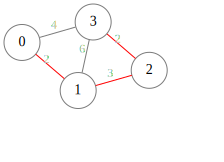

True

In [2]:
nodes1 = [i for i in range(4)]
edges1 = [(0, 1, 2), (0, 3, 4), (2, 1, 3), (2, 3, 2), (3, 1, 6)]
graph_nodes1 = algviz.parseGraph(nodes1, edges1, directed=False)

solver1 = PrimAlgorithm(graph_nodes1)
solver1.solve()

Input graph:

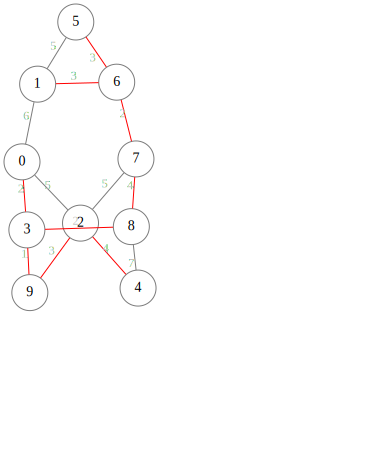

True

In [3]:

nodes2 = [i for i in range(10)]
edges2 = [
    (0, 1, 6), (0, 2, 5), (0, 3, 2), (2, 4, 4), (6, 5, 3),
    (1, 6, 3), (2, 7, 5), (3, 8, 2), (3, 9, 1), (7, 6, 2),
    (4, 8 ,7), (7, 8, 4), (9, 2, 3), (5, 1, 5)
]
graph_nodes2 = algviz.parseGraph(nodes2, edges2, directed=False)

solver2 = PrimAlgorithm(graph_nodes2)
solver2.solve()